# Analize positive and negative ratings

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('amazon_alexa.tsv',sep="\t")
#delete date
del df['date']
df

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1
...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,Black Dot,"Listening to music, searching locations, check...",1
3147,5,Black Dot,"I do love these things, i have them running my...",1
3148,5,White Dot,Only complaint I have is that the sound qualit...,1


In [4]:
df.describe(include='all')

,rating,variation,verified_reviews,feedback
count,3150.000000,3150,3150,3150.000000
unique,NaN,16,2301,NaN
top,NaN,Black Dot,,NaN
freq,NaN,516,79,NaN
mean,4.463175,NaN,NaN,0.918413
std,1.068506,NaN,NaN,0.273778
min,1.000000,NaN,NaN,0.000000
25%,4.000000,NaN,NaN,1.000000
50%,5.000000,NaN,NaN,1.000000
75%,5.000000,NaN,NaN,1.000000


In [2]:
#display different amazon alexa variations
df['variation'].unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

In [3]:
# remove rows with empty verified_reviews
df_filtered=df[df['verified_reviews'].str.strip().astype(bool)]
df_filtered.describe(include='all')

,rating,variation,verified_reviews,feedback
count,3071.000000,3071,3071,3071.000000
unique,NaN,16,2300,NaN
top,NaN,Black Dot,Love it!,NaN
freq,NaN,494,22,NaN
mean,4.483230,NaN,NaN,0.922501
std,1.044746,NaN,NaN,0.267425
min,1.000000,NaN,NaN,0.000000
25%,4.000000,NaN,NaN,1.000000
50%,5.000000,NaN,NaN,1.000000
75%,5.000000,NaN,NaN,1.000000


In [5]:
#remove whitespaces and set lower cases
df['verified_reviews'] = df['verified_reviews'].str.strip()
df['variation'] = df['variation'].str.strip()
df["verified_reviews"] = df["verified_reviews"].str.lower()
#delete neutral rating
df=df.loc[df['rating'] !=3]
df

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,love my echo!,1
1,5,Charcoal Fabric,loved it!,1
2,4,Walnut Finish,"sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,i have had a lot of fun with this thing. my 4 ...,1
4,5,Charcoal Fabric,music,1
...,...,...,...,...
3145,5,Black Dot,"perfect for kids, adults and everyone in betwe...",1
3146,5,Black Dot,"listening to music, searching locations, check...",1
3147,5,Black Dot,"i do love these things, i have them running my...",1
3148,5,White Dot,only complaint i have is that the sound qualit...,1


In [6]:
grouped = df.groupby("variation")["rating"].mean().sort_values()
grouped

variation
White                           4.155556
Black                           4.308943
White  Show                     4.329268
Black  Spot                     4.373913
White  Spot                     4.388350
Black  Plus                     4.445312
White  Plus                     4.472222
White  Dot                      4.523256
Sandstone Fabric                4.525000
Black  Dot                      4.556017
Black  Show                     4.573705
Configuration: Fire TV Stick    4.619186
Charcoal Fabric                 4.771429
Heather Gray Fabric             4.809524
Oak Finish                      4.857143
Walnut Finish                   4.888889
Name: rating, dtype: float64

<AxesSubplot:ylabel='variation'>

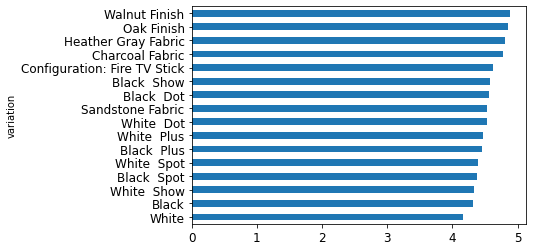

In [7]:
grouped.plot(kind="barh", fontsize=12)

In [8]:
#display rows with negative rating 
df.loc[df['rating'] <=2]

,rating,variation,verified_reviews,feedback
46,2,Charcoal Fabric,"it's like siri, in fact, siri answers more acc...",0
111,2,Charcoal Fabric,sound is terrible if u want good music too get...,0
141,1,Charcoal Fabric,not much features.,0
162,1,Sandstone Fabric,"stopped working after 2 weeks ,didn't follow c...",0
176,2,Heather Gray Fabric,sad joke. worthless.,0
...,...,...,...,...
3047,1,Black Dot,echo dot responds to us when we aren't even ta...,0
3048,1,White Dot,not connected to my phone playlist :(,0
3067,2,Black Dot,the only negative we have on this product is t...,0
3091,1,Black Dot,i didn’t order it,0


In [11]:
df.loc[df['rating'] <=2].describe()

,rating,feedback
count,257.000000,257.0
mean,1.373541,0.0
std,0.484688,0.0
min,1.000000,0.0
25%,1.000000,0.0
50%,1.000000,0.0
75%,2.000000,0.0
max,2.000000,0.0


In [14]:
df.loc[df['feedback'] ==0]

,rating,variation,verified_reviews,feedback
46,2,Charcoal Fabric,"it's like siri, in fact, siri answers more acc...",0
111,2,Charcoal Fabric,sound is terrible if u want good music too get...,0
141,1,Charcoal Fabric,not much features.,0
162,1,Sandstone Fabric,"stopped working after 2 weeks ,didn't follow c...",0
176,2,Heather Gray Fabric,sad joke. worthless.,0
...,...,...,...,...
3047,1,Black Dot,echo dot responds to us when we aren't even ta...,0
3048,1,White Dot,not connected to my phone playlist :(,0
3067,2,Black Dot,the only negative we have on this product is t...,0
3091,1,Black Dot,i didn’t order it,0


In [15]:
def positive(rating):
    if rating>=4:
        return 1
    return 0

df['positive'] = df['rating'].apply(lambda x: positive(x))
df

<ipython-input-15-93db8f6c5b5c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['positive'] = df['rating'].apply(lambda x: positive(x))


,rating,variation,verified_reviews,feedback,positive
0,5,Charcoal Fabric,love my echo!,1,1
1,5,Charcoal Fabric,loved it!,1,1
2,4,Walnut Finish,"sometimes while playing a game, you can answer...",1,1
3,5,Charcoal Fabric,i have had a lot of fun with this thing. my 4 ...,1,1
4,5,Charcoal Fabric,music,1,1
...,...,...,...,...,...
3145,5,Black Dot,"perfect for kids, adults and everyone in betwe...",1,1
3146,5,Black Dot,"listening to music, searching locations, check...",1,1
3147,5,Black Dot,"i do love these things, i have them running my...",1,1
3148,5,White Dot,only complaint i have is that the sound qualit...,1,1


In [16]:
import sklearn.linear_model
number_variables=df[['rating','feedback','positive']]
nump=np.array(number_variables)
X = nump[:,0:2]
y = nump[:,2:3]
#linear regression model
mnk = sklearn.linear_model.LinearRegression()
mnk.fit(X, y)
proc=mnk.predict(X.mean(axis=0).reshape(1, -1))*100
proc #percentage of positive ratings from positive and negative ratings

array([[91.42761841]])

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#test and train data
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00       560

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

[[ 40   0]
 [  0 560]]


In [18]:
from sklearn.ensemble import RandomForestClassifier

#forest model
forest = RandomForestClassifier()
forest.fit(X_train,y_train.ravel())
y_pred2=clf.predict(X_test)

print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00       560

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

